In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = pd.read_csv(path, header=None)
print(df.shape)
df.head()

(351, 35)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [19]:
# split into input and output columns
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(235, 34) (116, 34) (235,) (116,)


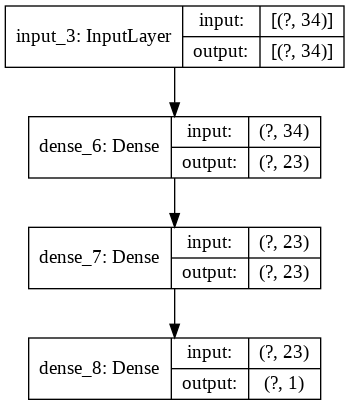

In [25]:
# define model
inputs = keras.Input(shape = (X_train.shape[1],))
x = Dense(23, activation='relu', kernel_initializer='he_normal')(inputs)
x = Dense(23, activation='relu', kernel_initializer='he_normal')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='simple_model_1')

# compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')

# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)

# plot the model
keras.utils.plot_model(model, show_shapes=True)

In [0]:
# fit the model
history = model.fit(X_train, y_train, batch_size=30, epochs=150, verbose=0, validation_split=0.3, callbacks=[es])

In [27]:
# evaluate the model
model.evaluate(X_test, y_test, verbose=0)

[0.2901182174682617, 0.8793103694915771]

In [28]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.942


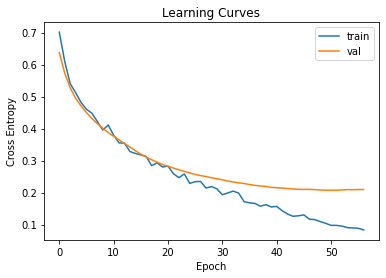

In [29]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [30]:
# save model to file
model.save('model.ml')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.ml/assets
